# Leitura dos dados

## Carregando bibliotecas

In [1]:
%%capture
!pip install --upgrade xlrd

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import xlrd

## Dados reservatório calibração – Ponto R4

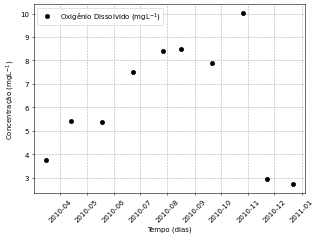

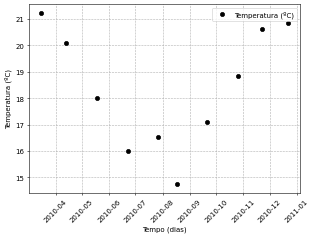

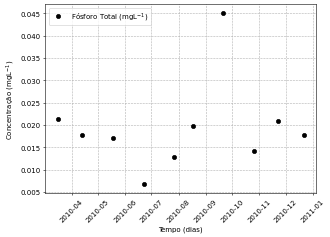

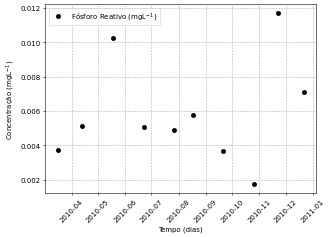

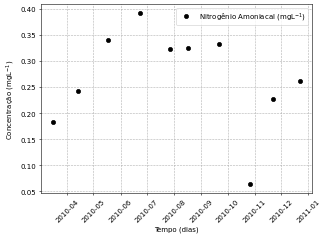

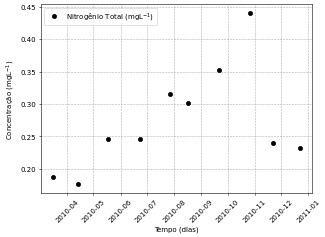

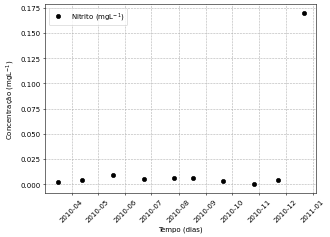

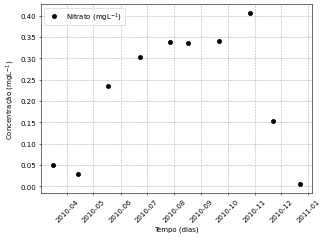

,data,OD (mg/L),temperatura (ºC),fosforo_total (ug/L),fosforo_reativo (ug/L),nitrog_amoniacal (ug/L),nitrog_total (ug/L),nitrito (ug/L),nitrato (ug/L)
15,2010-03-16,3.774000,21.235000,0.021353,0.003746,0.182048,0.187302,0.002148,0.049090
43,2010-04-13,5.399500,20.095000,0.017802,0.005105,0.242654,0.176480,0.003917,0.028542
78,2010-05-18,5.373000,18.000000,0.017120,0.010241,0.339960,0.246566,0.009353,0.234442
114,2010-06-23,7.528571,16.014286,0.006714,0.005082,0.392459,0.246694,0.005441,0.302503
148,2010-07-27,8.397143,16.538095,0.012717,0.004867,0.323124,0.316024,0.006201,0.338740
169,2010-08-17,8.491429,14.738095,0.019812,0.005787,0.324470,0.300946,0.006130,0.335530
204,2010-09-21,7.887143,17.095238,0.045122,0.003644,0.331795,0.351737,0.003646,0.340211
239,2010-10-26,10.036500,18.845000,0.014136,0.001731,0.063604,0.440527,0.000007,0.406988
266,2010-11-22,2.969524,20.628571,0.020908,0.011722,0.227887,0.240073,0.004482,0.153523
296,2010-12-22,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595


In [2]:
def dados_reservatorio_discretos(plotar=False):
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true')
    
    colunas = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
               'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
               'nitrito (ug/L)', 'nitrato (ug/L)']
    
    data_frame = pd.DataFrame(dados['data'])
    
    cont = 0
    for c in colunas:
        if cont == 0 or cont == 1:
            data_frame = data_frame.join(pd.DataFrame(dados[c]))
        else:
            data_frame = data_frame.join(pd.DataFrame(dados[c] * 10 ** (- 3)))
        cont += 1
    
    if plotar == True:
        nomes_ajustados = ['Oxigênio Dissolvido ($\mathrm{mgL}^{-1}$)', 'Temperatura (ºC)', 'Fósforo Total ($\mathrm{mgL}^{-1}$)',
                           'Fósforo Reativo ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Amoniacal ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Total ($\mathrm{mgL}^{-1}$)',
                           'Nitrito ($\mathrm{mgL}^{-1}$)', 'Nitrato ($\mathrm{mgL}^{-1}$)']

        for i in range(len(nomes_ajustados)):
            plt.figure(figsize=(7, 5), dpi=50)
            
            if i == 1:
                plt.ylabel('Temperatura (ºC)')
            else:
                plt.ylabel('Concentração ($\mathrm{mgL}^{-1}$)')
            
            plt.xlabel('Tempo (dias)')
            plt.plot(data_frame['data'], data_frame[colunas[i]], 'o', color='black', label=nomes_ajustados[i])
            plt.xticks(rotation=45)
            plt.grid(linestyle='--')
            plt.legend(loc='best')
#             plt.savefig(f'/Users/matheus/Desktop/figuras/figura_{i}')
            plt.show()
            plt.close()
    
    return data_frame.dropna()

dados_reservatorio_discretos(plotar=True)


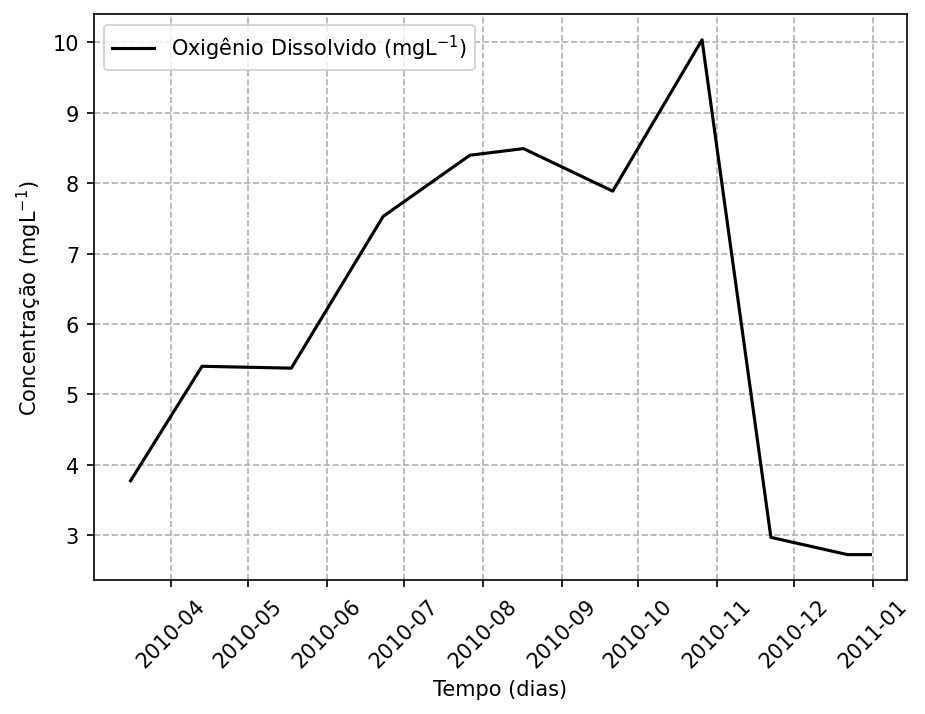

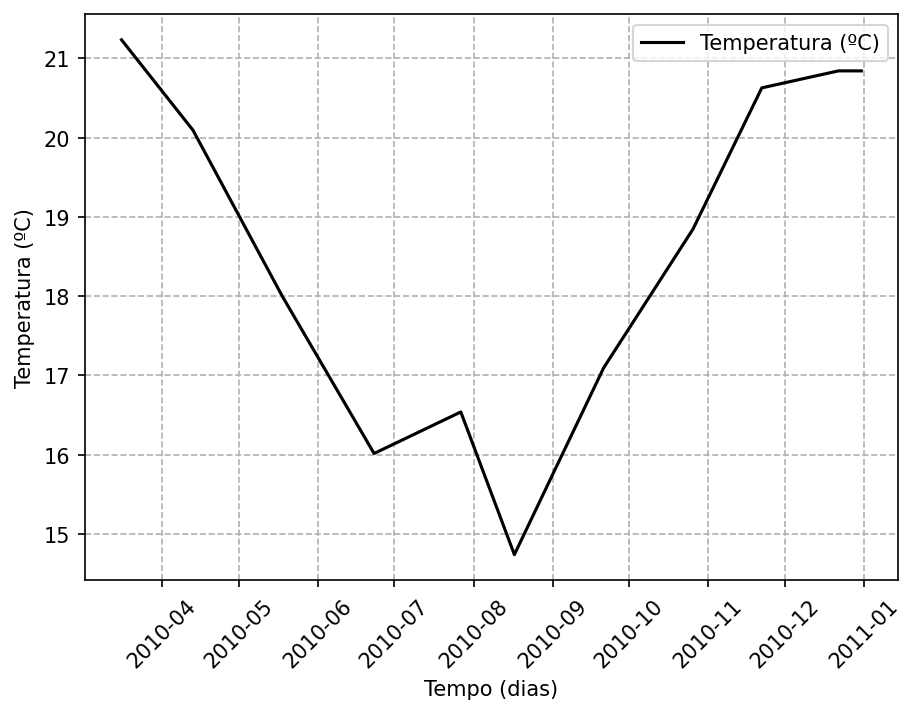

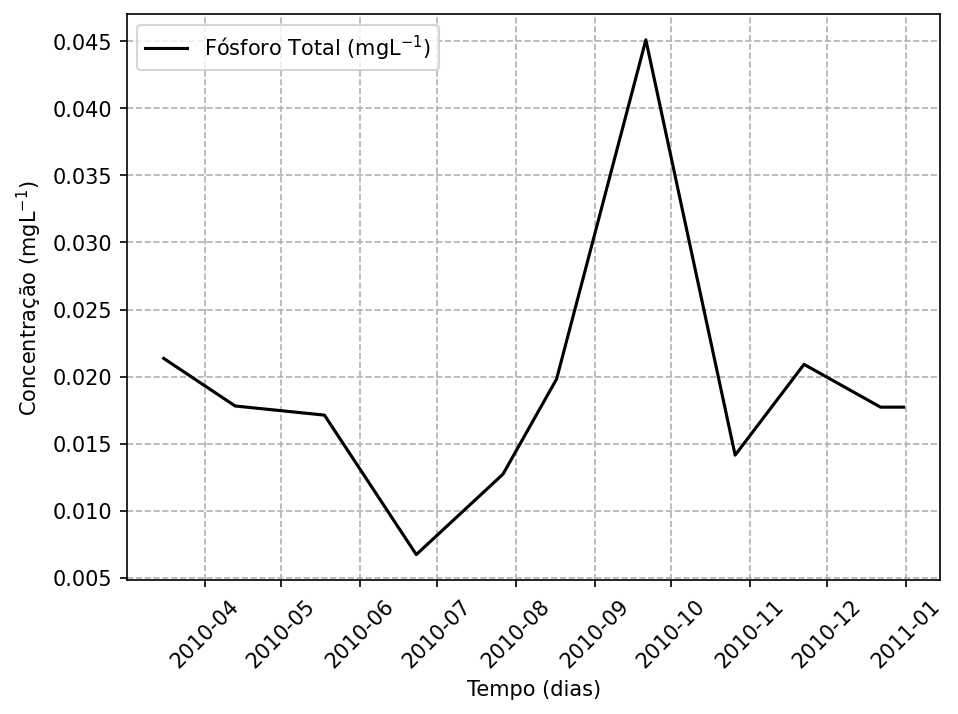

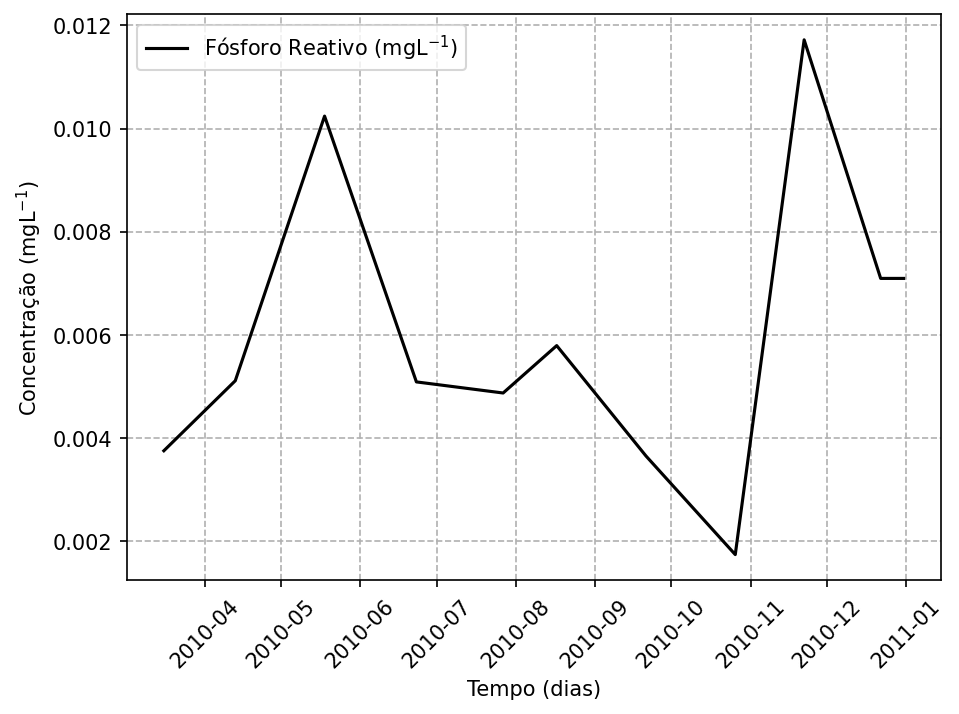

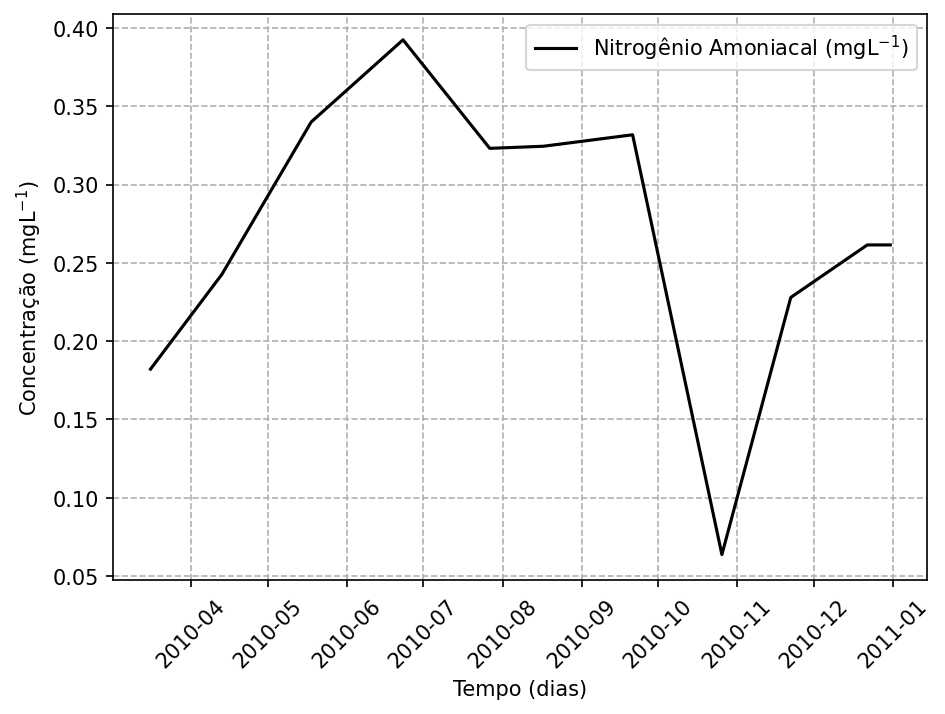

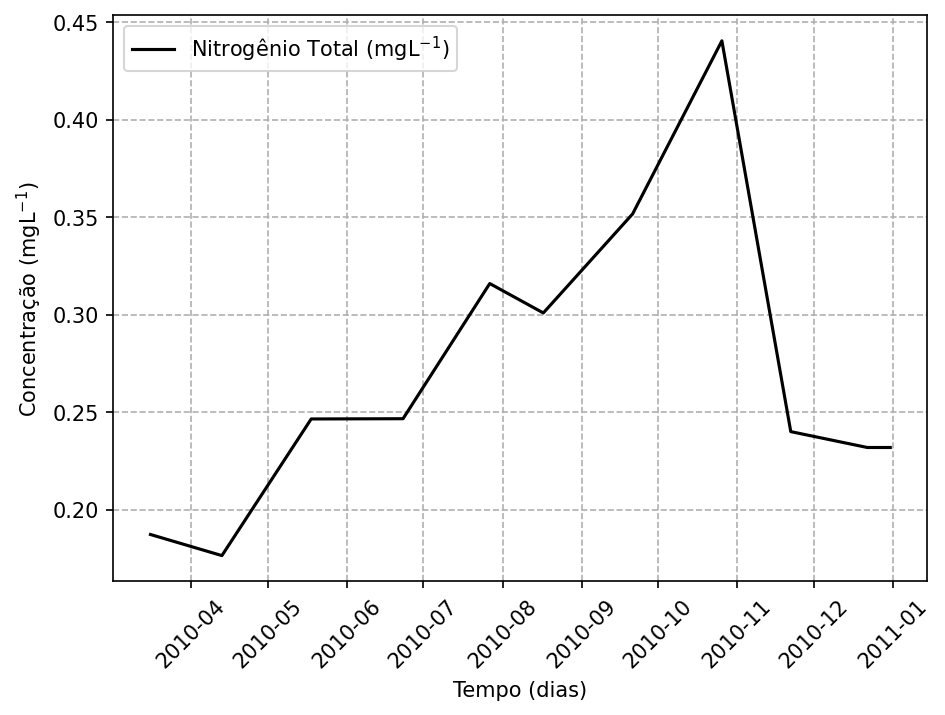

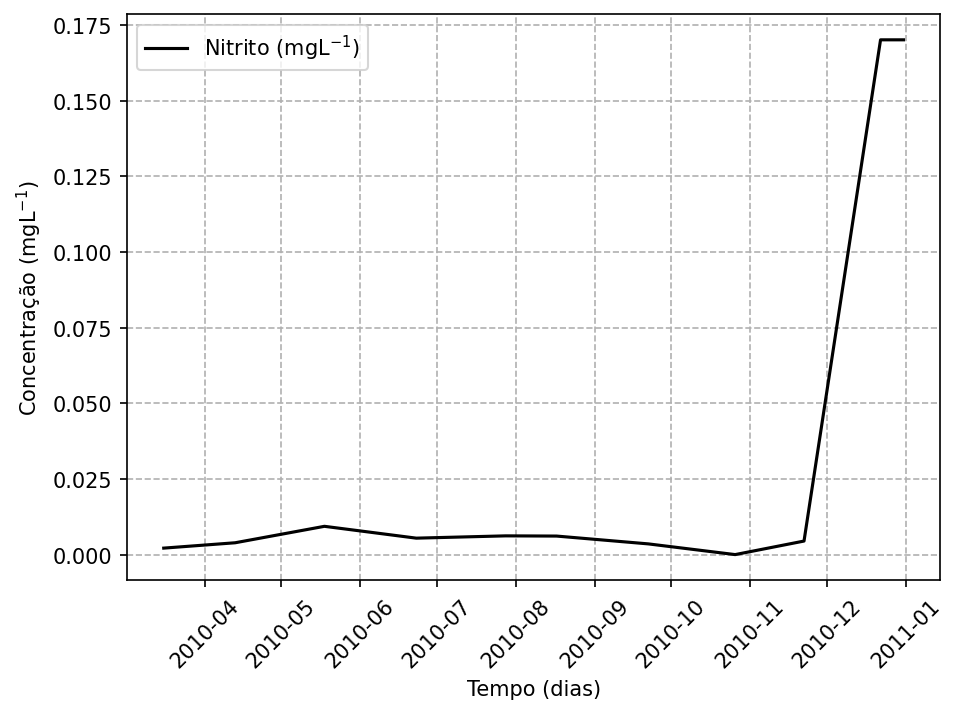

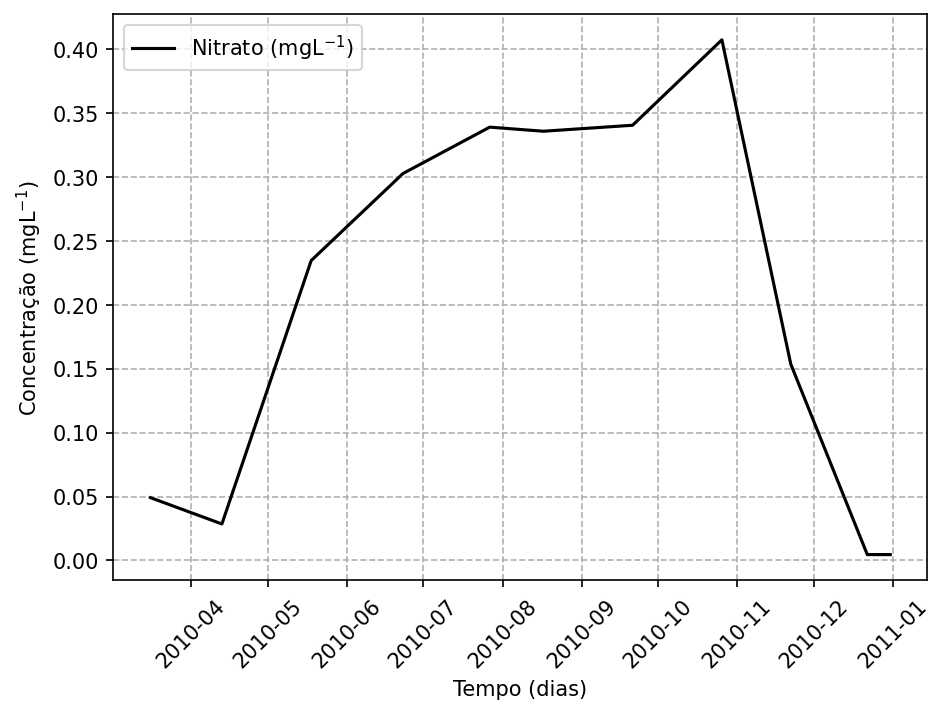

,data,OD (mg/L),temperatura (ºC),fosforo_total (ug/L),fosforo_reativo (ug/L),nitrog_amoniacal (ug/L),nitrog_total (ug/L),nitrito (ug/L),nitrato (ug/L)
15,2010-03-16,3.774000,21.235000,0.021353,0.003746,0.182048,0.187302,0.002148,0.049090
16,2010-03-17,3.832054,21.194286,0.021226,0.003794,0.184213,0.186916,0.002211,0.048356
17,2010-03-18,3.890107,21.153571,0.021099,0.003843,0.186377,0.186529,0.002274,0.047623
18,2010-03-19,3.948161,21.112857,0.020972,0.003891,0.188542,0.186143,0.002337,0.046889
19,2010-03-20,4.006214,21.072143,0.020845,0.003940,0.190706,0.185756,0.002401,0.046155
...,...,...,...,...,...,...,...,...,...
301,2010-12-27,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595
302,2010-12-28,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595
303,2010-12-29,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595
304,2010-12-30,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595


In [139]:
def dados_reservatorio_interpolado(plotar=False):
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true')
    
    colunas = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
               'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
               'nitrito (ug/L)', 'nitrato (ug/L)']
    
    data_frame = pd.DataFrame(dados['data'])
    
    cont = 0
    for c in colunas:
        if cont == 0 or cont == 1:
            interpolacao = pd.DataFrame(dados[c]).interpolate()
            data_frame = data_frame.join(interpolacao)
        else:
            interpolacao = pd.DataFrame(dados[c] * 10 ** (- 3)).interpolate()
            data_frame = data_frame.join(interpolacao)
            
        cont += 1
    
    if plotar == True:
        nomes_ajustados = ['Oxigênio Dissolvido ($\mathrm{mgL}^{-1}$)', 'Temperatura (ºC)', 'Fósforo Total ($\mathrm{mgL}^{-1}$)',
                           'Fósforo Reativo ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Amoniacal ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Total ($\mathrm{mgL}^{-1}$)',
                           'Nitrito ($\mathrm{mgL}^{-1}$)', 'Nitrato ($\mathrm{mgL}^{-1}$)']

        for i in range(len(nomes_ajustados)):
            plt.figure(figsize=(7, 5), dpi=150)
            
            if i == 1:
                plt.ylabel('Temperatura (ºC)')
            else:
                plt.ylabel('Concentração ($\mathrm{mgL}^{-1}$)')
            
            plt.xlabel('Tempo (dias)')
            plt.plot(data_frame['data'], data_frame[colunas[i]], '-', color='black', label=nomes_ajustados[i])
            plt.xticks(rotation=45)
            plt.grid(linestyle='--')
            plt.legend(loc='best')
#             plt.savefig(f'/Users/matheus/Desktop/figuras/figura_{i}')
            plt.show()
            plt.close()
    
    return data_frame.dropna()


dados_reservatorio_interpolado(plotar=True)


## Dados tributários

In [4]:
def dados_tributarios():
    df_trib_F4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_F4')
    df_trib_TE_10 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_TE_10')
    df_trib_TD_4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_TD_4')
    df_trib_F5 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_F5')

    colunas = ['Oxigênio dissolvido', 'temperatura',
               'Fósforo total', 'Fósforo reativo', 'Nitrogênio amonical',
               'Nitrogênio total', 'Nitrito', 'Nitrato']
    
    lista = [df_trib_F4, df_trib_TE_10, df_trib_TD_4, df_trib_F5]
    
    nomes = ['df_trib_F4', 'df_trib_TE_10', 'df_trib_TD_4', 'df_trib_F5']
    
    dicionario = {}
    
    cont = 0
    for i in range(len(lista)):
        data_frame = pd.DataFrame(lista[i]['data'])
        
        for c in colunas:
            if cont == 0 or cont == 1:
                interpolacao = pd.DataFrame(lista[i][c]).interpolate()
            else:
                interpolacao = pd.DataFrame(lista[i][c]  * 10 ** (- 3)).interpolate()
            
            data_frame = data_frame.join(pd.DataFrame(interpolacao))
            cont += 1
        
        dicionario[nomes[i]] = data_frame.dropna()
    
    return dicionario
            

dados_tributarios()['df_trib_F4']


,data,Oxigênio dissolvido,temperatura,Fósforo total,Fósforo reativo,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato
15,2010-03-16,9.000000,21.600000,0.042000,0.009460,0.141000,0.182000,0.019180,0.278000
16,2010-03-17,9.007143,21.489286,0.041888,0.009366,0.139079,0.182179,0.018714,0.273107
17,2010-03-18,9.014286,21.378571,0.041775,0.009272,0.137157,0.182357,0.018248,0.268214
18,2010-03-19,9.021429,21.267857,0.041663,0.009178,0.135236,0.182536,0.017782,0.263321
19,2010-03-20,9.028571,21.157143,0.041550,0.009084,0.133314,0.182714,0.017316,0.258429
...,...,...,...,...,...,...,...,...,...
301,2010-12-27,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
302,2010-12-28,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
303,2010-12-29,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
304,2010-12-30,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900


## Dados estação barragem

In [5]:
def dados_barragem():
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/arquivos/estacao-barragem.xls?raw=true')
    
    colunas = ['Vel. Vento média (m/s)', 'Temp. média (ºC)',
               'Umid. rel. média (%)', 'Prec. (mm)']
    
    dados = dados.replace(to_replace=- 6999.0, value=np.nan)
    
    dados_media_diaria = dados[['Data', 'Vel. Vento média (m/s)', 'Temp. média (ºC)', 'Umid. rel. média (%)']]
    dados_media_diaria = dados_media_diaria.groupby(by=['Data'], as_index=False).mean()
    
    prec_acumulada_diaria = dados[['Data', 'Prec. (mm)']]
    prec_media_diaria = prec_acumulada_diaria.groupby(by=['Data'], as_index=False).sum()
    
    data_frame = dados_media_diaria.join(pd.DataFrame(prec_media_diaria['Prec. (mm)']))
    
    data_frame_final = pd.DataFrame(data_frame['Data'])
    
    for c in colunas:
        interpolacao = pd.DataFrame(data_frame[c]).interpolate()
        data_frame_final = data_frame_final.join(interpolacao)
    
    return data_frame_final

# dados_barragem().iloc[250:300]
# pd.DataFrame(dados_barragem())['Data']
dados_barragem()

,Data,Vel. Vento média (m/s),Temp. média (ºC),Umid. rel. média (%),Prec. (mm)
0,2010-01-01,4.162083,18.411875,82.362604,0.000
1,2010-01-02,2.439448,21.904062,79.326146,1.778
2,2010-01-03,2.305406,21.328750,90.639583,20.062
3,2010-01-04,1.932000,21.798333,88.257500,20.066
4,2010-01-05,2.310865,22.262812,85.556979,4.064
...,...,...,...,...,...
360,2010-12-27,2.554646,20.214792,74.391250,0.000
361,2010-12-28,2.383969,20.504479,75.145313,0.000
362,2010-12-29,3.506115,19.967500,72.931562,0.000
363,2010-12-30,3.274115,19.008750,76.535729,0.000


In [6]:
def dados_vazao():
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/arquivos/vazaoSWAT_entradaSisBaHiA.xls?raw=true')
    
    dados_filtrados = pd.DataFrame(dados[["ponto", "Dia", "F4", "TD4", "TE10"]].copy()) # m³/d - conferir unidades

    return dados_filtrados

dados_vazao()

,ponto,Dia,F4,TD4,TE10
0,86400,1,1.715,0.6591,0.27690
1,172800,2,1.640,0.5650,0.24630
2,259200,3,1.908,0.7772,0.24650
3,345600,4,1.857,0.6743,0.23670
4,432000,5,2.241,0.8309,0.23390
...,...,...,...,...,...
359,31104000,360,1.708,0.2824,0.08848
360,31190400,361,1.588,0.2439,0.08201
361,31276800,362,1.498,0.2167,0.07665
362,31363200,363,1.426,0.2044,0.07210


In [7]:
# Evaporação pela equação de Thornthwaite

# E = 16 * (10*T/I) ** a
# I = soma(T_(1 a 12)/5)**1,514
# a = 6.75*(10**-7) * (I ** 3) - 7.71 * (10**-5) * (I**2) + 1,792 * (10**-2) * I + 0.49239

# Temperatura média do mês (ºC)

def dados_evapo():
    dados_temperatura_dia = dados_barragem()['Temp. média (ºC)']

    # temp_media_dia.iloc[0:31]

    temp_media_mes1 = dados_temperatura_dia.iloc[0:31].mean()
    temp_media_mes2 = dados_temperatura_dia.iloc[32:60].mean()
    temp_media_mes3 = dados_temperatura_dia.iloc[61:92].mean()
    temp_media_mes4 = dados_temperatura_dia.iloc[93:123].mean()
    temp_media_mes5 = dados_temperatura_dia.iloc[124:155].mean()
    temp_media_mes6 = dados_temperatura_dia.iloc[156:186].mean()
    temp_media_mes7 = dados_temperatura_dia.iloc[187:218].mean()
    temp_media_mes8 = dados_temperatura_dia.iloc[219:249].mean()
    temp_media_mes9 = dados_temperatura_dia.iloc[250:281].mean()
    temp_media_mes10 = dados_temperatura_dia.iloc[282:313].mean()
    temp_media_mes11 = dados_temperatura_dia.iloc[314:344].mean()
    temp_media_mes12 = dados_temperatura_dia.iloc[345:376].mean()

    temp_media_mes_dict = {'Mês' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Temp. média (ºC)' : [temp_media_mes1, temp_media_mes2, temp_media_mes3, temp_media_mes4, temp_media_mes5, temp_media_mes6, temp_media_mes7, temp_media_mes8, temp_media_mes9, temp_media_mes10, temp_media_mes11, temp_media_mes12]}

    temp_media_mes = pd.DataFrame(temp_media_mes_dict)

    # Determinando valor de I

    I = (temp_media_mes['Temp. média (ºC)'].iloc[0]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[1]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[2]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[3]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[4]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[5]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[6]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[7]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[8]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[9]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[10]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[11]/5)**1.514 

    # Determinando valor de a

    a = 6.75 * (10**-7) * (I ** 3) - 7.71 * (10**-5) * (I**2) + 1.792 * (10**-2) * I + 0.49239

    # Determinando valor de E para cada mês (mm/mes)

    E1 = 16 * (10*21.259224/I) ** a
    E2 = 16 * (10*21.699927/I) ** a
    E3 = 16 * (10*20.12336/I) ** a
    E4 = 16 * (10*16.491354/I) ** a
    E5 = 16 * (10*13.600744/I) ** a
    E6 = 16 * (10*13.770589/I) ** a
    E7 = 16 * (10*13.479297/I) ** a
    E8 = 16 * (10*15.204781/I) ** a
    E9 = 16 * (10*15.994973/I) ** a
    E10 = 16 * (10*11.824963/I) ** a
    E11 = 16 * (10*19.340333/I) ** a
    E12 = 16 * (10*19.749505/I) ** a

    # Evapotranspiração em mm/d

    E_mes = np.array([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12])

    E_dia = E_mes/30

    E_mar = np.repeat(E_dia[2], 31)
    E_abr = np.repeat(E_dia[3], 30)
    E_mai = np.repeat(E_dia[4], 31)
    E_jun = np.repeat(E_dia[5], 30)
    E_jul = np.repeat(E_dia[6], 31)
    E_ago = np.repeat(E_dia[7], 31)
    E_set = np.repeat(E_dia[8], 30)
    E_out = np.repeat(E_dia[9], 31)
    E_nov = np.repeat(E_dia[10], 30)
    E_dez = np.repeat(E_dia[11], 31)

    E_dia_acumulado = np.concatenate([E_mar, E_abr, E_mai, E_jun, E_jul, E_ago, E_set, E_out, E_nov, E_dez ]) # array com valores diários de evapotransp

    E_dia_acumulado_df = pd.DataFrame(E_dia_acumulado)
    E_dia_acumulado_df = E_dia_acumulado_df.rename(columns = {0:'Evaproação (mm/d)'})

    return E_dia_acumulado_df
    

dados_evapo()

,Evaproação (mm/d)
0,2.744085
1,2.744085
2,2.744085
3,2.744085
4,2.744085
...,...
301,2.653697
302,2.653697
303,2.653697
304,2.653697


# Solução analítica

In [8]:
from __future__ import division
from sympy import *


# Q_F4, Q_TE10, Q_TD4, P, A_s, E, k_a, V, w, k_a, O_s, k_d, L, r_on, k_n, L_n, p_a, r_ca, r_oc, k_ra, alpha, SOD, H = symbols


In [160]:
def calcula_Ni_sozinho(plotar=False, zerar_cargas=True):
    t, Q_F4, Q_TE10  = symbols('t Q_F4 Q_TE10')
    Q_TD4, P, As     = symbols('Q_TD4 P A_s')
    E, k_dn, V       = symbols('E k_dn V')
    w, k_ni, Na      = symbols('w k_ni Na')
    r_na, k_g, alpha = symbols('r_na k_g alpha')

    Ni = symbols('Ni', cls=Function)

    Ni_0 = symbols('Ni_0')
    
    if zerar_cargas == True:
        cargas = 0
    else:
        cargas = (Q_F4 + Q_TE10 + Q_TD4 + P * As - E * As + k_dn * V) / V

    Ni_eq_diff = Eq(Ni(t).diff(t), - (Ni(t) * cargas) / V + w / V + k_ni * Na - r_na * k_g * alpha)
    display('Equacao diferencial Ni:', Ni_eq_diff)

    Ni_eq_diff_sol = dsolve(Ni_eq_diff, ics={Ni(0): Ni_0})
    display('Solucao da Eq. diferencial para Ni:', Ni_eq_diff_sol)
    
    Ni_eq_diff_sol_subs = Ni_eq_diff_sol.rhs.subs({k_dn: 1, V: 1, w: 1,
                                               k_ni: 1, Na: 1, r_na: 1,
                                               k_g: 1, alpha: 1, Ni_0: 1})

    Ni_eq_diff_sol_subs = Ni_eq_diff_sol_subs.subs({As: 140, V: 2560})

    display('Valores substituidos Eq. analítica Ni(t):', Ni_eq_diff_sol_subs)

calcula_Ni_sozinho()

'Equacao diferencial Ni:'

Eq(Derivative(Ni(t), t), Na*k_ni - alpha*k_g*r_na + w/V)

'Solucao da Eq. diferencial para Ni:'

Eq(Ni(t), Ni_0 + t*(V*(Na*k_ni - alpha*k_g*r_na) + w)/V)

'Valores substituidos Eq. analítica Ni(t):'

t + 1

In [158]:
# Ni_eq_diff_sol_subs = Ni_eq_diff_sol.rhs.subs({k_dn: 1, V: 2560, w: 1,
#                                                k_ni: 1, Na: 2, r_na: 7.,
#                                                k_g: 2.5, alpha: 12, Ni_0: 0.01})

Ni_eq_diff_sol_subs = Ni_eq_diff_sol.rhs.subs({k_dn: 1, V: 1, w: 1,
                                               k_ni: 1, Na: 1, r_na: 1,
                                               k_g: 1, alpha: 1, Ni_0: 1}) # Relativamente certo

Ni_eq_diff_sol_subs = Ni_eq_diff_sol_subs.subs({As: 140, V: 2560}) #P #E: 1 #Q_F4: 1 #Q_TE10: 1 #Q_TD4: 1

display('Valores substituidos Eq. analítica Ni(t):', Ni_eq_diff_sol_subs)

'Valores substituidos Eq. analítica Ni(t):'

t + 1

In [130]:
# Variáveis que variam

vazao_TD4 = dados_vazao()['TD4']
vazao_TD4_dias_interesse = vazao_TD4[73:]
 # Ok

print(len(vazao_TD4_dias_interesse))

vazao_TE10 = dados_vazao()['TE10']
vazao_TE10_dias_interesse = vazao_TE10[73:]

print(len(vazao_TE10_dias_interesse))

vazao_F4 = dados_vazao()['F4']
vazao_F4_dias_interesse = vazao_F4[73:]

print(len(vazao_F4_dias_interesse))

evaporacao = dados_evapo().to_numpy()[15:]
len(evaporacao)

time = 291
dt = 1
tvals = np.arange(0, time, dt)
print(len(tvals))

291
291
291
291


In [89]:
evaporacao = dados_evapo().to_numpy()[15:]

evap_list = []
for e in evaporacao:
    evap_list.append(e)

evap = np.concatenate(evap_list)

In [90]:
precipitacao = dados_barragem()['Prec. (mm)']

In [91]:
chuva = precipitacao[74:].to_numpy()
print(len(chuva))

291


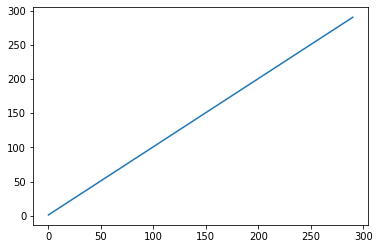

In [159]:
# func    = lambdify((t, Q_TD4, Q_TE10, Q_F4, E, P), Ni_eq_diff_sol_subs, 'numpy')
# t_vals  = np.arange(0, time, dt)
# Ni_vals = func(t_vals, vazao_TD4_dias_interesse, vazao_TE10_dias_interesse,
#                vazao_F4_dias_interesse, 0, 0)

# Ni_vals = func(t_vals, 0, 0, 0, 0, 0)

func   = lambdify(t, Ni_eq_diff_sol_subs)
t_vals = np.arange(0, time, dt)
Ni_vals = func(t_vals)

plt.plot(t_vals, Ni_vals)
plt.show()